In [33]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import statistics as st
from sklearn.model_selection import train_test_split

In [34]:
data = pd.read_csv('/content/drive/My Drive/Colab Notebooks/lin_reg_data.csv')
data.head()

,X,Y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [35]:
X=data.iloc[:,0]
y=data.iloc[:,1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5,random_state=0)

In [36]:
class LinearRegression:
        def __init__(self,X_data,Y_data,l,iterations): #initialize all parameters
            self.X=X_data
            self.Y=Y_data
            #weight and bias
            self.m=0
            self.c=0
            self.L=l #learning rate
            self.iter=iterations #num of iterations
            self.n=float(len(self.X))  #size of data
        
        def cost(self,pred_y): #cost function
            cost=np.sum(np.square(self.Y-pred_y))/(2*self.n)
            return(cost)
        
        def fit(self):
            self.history=np.zeros(self.iter)
            #updating values of m and c
            for i in range(self.iter):
                pred_y=self.m*X + self.c
                #print(pred_y)
                Dm= (-2/self.n)*(self.X*(self.Y-pred_y))
                Dc= (-2/self.n)*(self.Y-pred_y)
                #update
                self.m=self.m-Dm*self.L
                self.c=self.c-Dc*self.L
                #cost is calculated for every iteration
                self.history[i]=self.cost(pred_y)
            self.mse=self.MSE(self.Y,pred_y)
                
                
                
       
        def MSE(self,pred_y,Y):
            errors=Y-pred_y #error is the difference between actual and predicted value
            mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
            return mse
        
        def results(self):
            fig=plt.figure(figsize=(14,14))
            a1=fig.add_subplot(211)

            plt.title('minimisation of errors across the iterations')
            a1.plot(self.history)


            #making predictions
            a2=fig.add_subplot(212)
            final_y=self.m*self.X +self.c 
            plt.scatter(self.X,self.Y)
            plt.title('regrssion line')
            a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') #plotting the red line 
            
            plt.show()
            
            print ('Mean Squared Error=',self.mse)

In [37]:
class RidgeLinearRegression:
       def __init__(self,X_data,Y_data,l,l2,iterations): #initialize all parameters
           self.X=X_data
           self.Y=Y_data
           #weight and bias
           self.m=0
           self.c=0
           self.L=l #learning rate
           self.l2=l2 #regularization parameter
           self.iter=iterations #num of iterations
           self.n=float(len(self.X))  #size of data
       
       def cost(self,pred_y): #cost function
           cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l2*np.sum(np.square(self.m))
           return(cost)
       
       def fit(self):
           self.history=np.zeros(self.iter)
           #updating values of m and c
           for i in range(self.iter):
               pred_y=self.m*self.X + self.c
               #print(pred_y)
               Dm= (-2/self.n)*(self.X*(self.Y-pred_y))+2*self.l2*self.m
               Dc= (-2/self.n)*(self.Y-pred_y)
               #update
               self.m=self.m-Dm*self.L
               self.c=self.c-Dc*self.L
               #cost is calculated for every iteration
               self.history[i]=self.cost(pred_y)
           self.mse=self.MSE(self.Y,pred_y)
               
               
               
      
       def MSE(self,pred_y,Y):
           errors=Y-pred_y #error is the difference between actual and predicted value
           mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
           return mse
       
       def results(self):
           fig=plt.figure(figsize=(14,14))
           a1=fig.add_subplot(211)

           plt.title('minimisation of errors across the iterations')
           a1.plot(self.history)


           #making predictions
           a2=fig.add_subplot(212)
           final_y=self.m*self.X +self.c 
           plt.scatter(self.X,self.Y)
           plt.title('regrssion line')
           a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') #plotting the red line 
           
           plt.show()
           
           print ('Mean Squared Error=',self.mse)

In [40]:
class LassoLinearRegression:
       def __init__(self,X_data,Y_data,l,l1,iterations): #initialize all parameters
           self.X=X_data
           self.Y=Y_data
           #weight and bias
           self.m=np.random.randn(X_data.shape[0])
           self.c=0
           self.L=l #learning rate
           self.l1=l1 #regularization parameter
           self.iter=iterations #num of iterations
           self.n=float(len(X_data))  #size of data
       
       def cost(self,pred_y): #cost function
           cost=np.sum(np.square(self.Y-pred_y))/(2*self.n) + self.l1*np.sum(self.m)
           return(cost)
       
       def fit(self):
           self.history=np.zeros(self.iter)
           pred_y=np.zeros((self.Y.shape))
           for j in range(self.iter):
               for i in range(0,len(self.X)):
                       pred_y[i]=self.m[i]*self.X[i]+self.c
                       if self.m[i]>0:
                           Dm= (-2/self.n)*(self.X[i]*(self.Y[i]-pred_y[i]))-self.l1 
                       else:
                           Dm= (-2/self.n)*(self.X[i]*(self.Y[i]-pred_y[i]))+self.l1


                       Dc= (-2/self.n)*(self.Y[i]-pred_y[i])
                       #update
                       self.m[i]=self.m[i]-Dm*self.L
                       self.c=self.c-Dc*self.L
               self.history[j]=self.cost(pred_y)
           self.mse=self.MSE(self.Y,pred_y)

             
      
       def MSE(self,pred_y,Y):
           errors=Y-pred_y #error is the difference between actual and predicted value
           mse=np.sum(np.square(errors))/self.n #mean of sum of square of erros
           return mse
       
       def results(self):
           fig=plt.figure(figsize=(14,14))
           a1=fig.add_subplot(211)

           plt.title('minimisation of errors across the iterations')
           a1.plot(self.history)


           #making predictions
           a2=fig.add_subplot(212)
           final_y=self.m*self.X +self.c 
           plt.scatter(self.X,self.Y)
           plt.title('regrssion line')
           a2.plot([min(self.X),max(self.X)],[min(final_y),max(final_y)],color='red') #plotting the red line 
           
           plt.show()
           
           print ('Mean Squared Error=',self.mse)

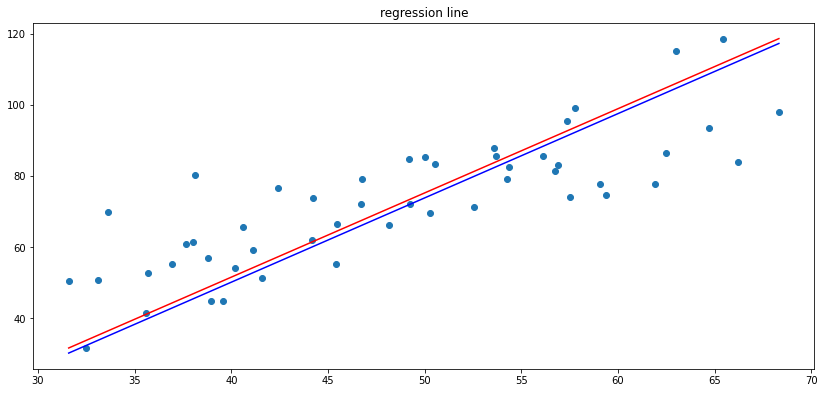

In [45]:
l=LinearRegression(X_train,y_train,0.005,100)
l.fit()


r= RidgeLinearRegression(X_train,y_train,0.005,1,100)
r.fit()

#la= LassoLinearRegression(X_train,y_train,0.005,1,100)
#la.fit()

fig=plt.figure(figsize=(14,14))
a2=fig.add_subplot(212)

final_y_linear=l.m*l.X +l.c 
final_y_ridge=r.m*r.X +r.c
final_y_lasso=la.m*la.X +la.c

plt.scatter(X_train,y_train)
plt.title('regression line')

#For linear regression
a2.plot([min(l.X),max(l.X)],[min(final_y_linear),max(final_y_linear)],color='red')

#For linear regression
a2.plot([min(r.X),max(r.X)],[min(final_y_ridge),max(final_y_ridge)],color='blue')

#For linear regression
#a2.plot([min(la.X),max(la.X)],[min(final_y_lasso),max(final_y_lasso)],color='green')

plt.show()
#l.results()

rss_y_linear = np.sum(np.square(y_train - final_y_linear))
rss_X_linear = np.sum(np.square(X_train - final_y_linear))
#print("RSS = {}".format(rss))

rss_y_linear = np.sum(np.square(y_train - final_y_linear))
rss_X_linear = np.sum(np.square(X_train - final_y_linear))